# 離散フーリエ変換

## サンプリング定理

信号 $f(t)$ の離散的な点 $\left\{t_k\right\}, k=0, \pm 1, \pm 2, \pm 3, \ldots$ での値 $\left\{f_k\right\}$ を **サンプル点** $\left\{t_k\right\}$ での **サンプル値** と呼ぶ。
サンプル点 $\left\{t_k\right\}$ の間隔 $\tau$ を  **サンプル間隔** と呼ぶ。サンプル値 $\left\{f_k\right\}$ のみから連続関数を再現することを **補間** という。

次の性質を持つ関数 $\phi(t)$ をサンプル間隔 $\tau$ の **補間関数** と呼ぶ

$$
\phi(t)= \begin{cases}1 & t=0 \\ 0 & t= \pm \tau, \pm 2 \tau, \pm 3 \tau, \ldots\end{cases}
$$


補間関数の例は$\operatorname{sinc}$（cardinal sine）関数

$$
\operatorname{sinc}(x) =\frac{\sin \pi x}{\pi x}
$$


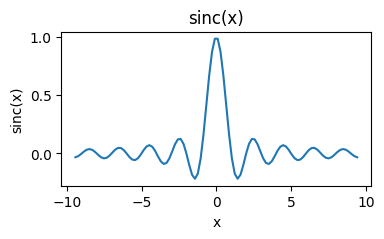

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sinc(x):
    return np.sin(np.pi * x) / (np.pi * x)

fig, ax = plt.subplots(figsize=[4,2])

x = np.linspace(-3*np.pi, 3*np.pi, 100)
ax.plot(x, sinc(x))
ax.set(title="sinc(x)", xlabel="x", ylabel="sinc(x)")
fig.show()


$$
\hat{f}(t)=\sum_{k=-\infty}^{\infty} f_k \phi\left(t-t_k\right)
$$

はすべてのサンプル点$t_i$でサンプルの値$f_i$をとる

:::{admonition} 定義：帯域制限

信号$f(t)$のフーリエ変換を$F(\omega)$とするとき、

$$
|\omega| \geq W \implies F(\omega)=0
$$

であれば、信号$f(t)$は **帯域幅** $W$ に **帯域制限** されているという
:::

サンプリング間隔$\tau$を半周期（波1つ分。sinなら$\pi$の幅）とする振動は各周波数$W=\pi/\tau$を持つ

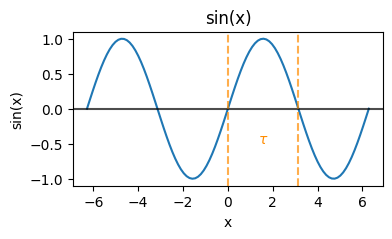

In [129]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[4,2])
x = np.linspace(-2*np.pi, 2*np.pi, 100)
ax.plot(x, np.sin(x))
ax.set(title="sin(x)", xlabel="x", ylabel="sin(x)")
ax.axhline(0, color="black", alpha=0.7)

ax.axvline(0, color="darkorange", linestyle="--", alpha=0.7)
ax.axvline(np.pi, color="darkorange", linestyle="--", alpha=0.7)
ax.text(np.pi / 2, -0.5, r"$\tau$", color="darkorange", ha="center")

fig.show()

:::{admonition} サンプリング定理

帯域幅 $W$ に帯域制限された信号 $f(t)$ はサンプル間隔

$$
\tau=\frac{\pi}{W}
$$


のサンプル点 $\left\{t_k\right\}$ でのサンプル値 $\left\{f_k\right\}$ のみから次のように再現される

$$
f(t)=\sum_{k=-\infty}^{\infty} f_k \operatorname{sinc} \frac{t-t_k}{\tau}
$$

:::

:::{dropdown} 証明

信号$f(t)$のフーリエ変換は

$$
f(t)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \mathrm{~d} \omega, \quad F(\omega)=\int_{-\infty}^{\infty} f(t) e^{-i \omega t} \mathrm{~d} t
$$

となる。$F(\omega)$は区間$[-W,W]$でフーリエ級数に展開できる

$$
F(\omega)=\sum_{k=-\infty}^{\infty} C_k e^{i \pi k \omega / W}, \quad C_k=\frac{1}{2 W} \int_{-W}^W F(\omega) e^{-i \pi k \omega / W} \mathrm{~d} \omega
$$

区間 $[-W, W]$ の外では $F(\omega)=0$ であるから、 $C_k$ は次のように計算できる。

$$
\begin{aligned}
C_k & =\frac{1}{2 W} \int_{-\infty}^{\infty} F(\omega) e^{-i \pi k \omega / W} \mathrm{~d} \omega\\
&=\frac{\pi}{W} \frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega(-\pi k / W)} \mathrm{d} \omega \\
& =\frac{\pi}{W} f\left(-\frac{\pi k}{W}\right)=\tau f(-k \tau)=\tau f_{-k}
\end{aligned}
$$

よって$F(\omega)$は区間$[-W,W]$で

$$
\begin{aligned}
F(\omega) & =\sum_{k=-\infty}^{\infty} \tau f_{-k} e^{i \pi k \omega / W}=\tau \sum_{k=-\infty}^{\infty} f_k e^{-i \pi k \omega / W} \\
& =\tau \sum_{k=-\infty}^{\infty} f_k e^{-i k \tau \omega}=\tau \sum_{k=-\infty}^{\infty} f_k e^{-i t_k \omega}
\end{aligned}
$$

となる。

まとめると、

$$
\begin{aligned}
f(t) & =\frac{1}{2 \pi} \int_{-W}^W F(\omega) e^{i \omega t} \mathrm{~d} \omega\\
& =\frac{1}{2 \pi} \int_{-W}^W\left(\tau \sum_{k=-\infty}^{\infty} f_k e^{-i t_k \omega}\right) e^{i \omega t} \mathrm{~d} \omega \\
& =\frac{\tau}{2 \pi} \sum_{k=-\infty}^{\infty} f_k \int_{-W}^W e^{i\left(t-t_k\right) \omega} \mathrm{d} \omega \\
& =\frac{\tau}{2 \pi} \sum_{k=-\infty}^{\infty} f_k \int_{-W}^W\left(\cos \left(t-t_k\right) \omega+i \sin \left(t-t_k\right) \omega\right) \mathrm{d} \omega \\
& =\frac{\tau}{\pi} \sum_{k=-\infty}^{\infty} f_k \int_0^W \cos \left(t-t_k\right) \omega \mathrm{d} \omega \\
& =\frac{1}{W} \sum_{k=-\infty}^{\infty} f_k \int_0^W \cos \left(t-t_k\right) \omega \mathrm{d} \omega
    \quad (\because \tau = \pi/W) \\
& =\frac{1}{W} \sum_{k=-\infty}^{\infty} f_k\left[\frac{\sin \left(t-t_k\right) \omega}{\left(t-t_k\right)}\right]_0^W\\
& =\sum_{k=-\infty}^{\infty} f_k \frac{\sin W\left(t-t_k\right)}{W\left(t-t_k\right)} \\
& =\sum_{k=-\infty}^{\infty} f_k \operatorname{sinc} \frac{W\left(t-t_k\right)}{\pi}\\
& =\sum_{k=-\infty}^{\infty} f_k \operatorname{sinc} \frac{t-t_k}{\tau}
\end{aligned}
$$

:::

:::{margin}
サンプリング定理を導いたのは情報理論の創始者であるシャノン（Claude E. Shannon: 1916-2001）
:::

間隔$\tau$でサンプリングすると$W=\pi/\tau$以上の周波数の信号は捉えられない。$W=\pi/\tau$をサンプリング間隔$\tau$に対する **ナイキスト周波数** とよぶ。

一定の条件を満たす間隔で得られたサンプルと、一定の条件を満たす信号は、 **離散的なサンプルからもとの連続的な信号を再現できる** というのがサンプリング定理。

音声などの信号に限らず、デジタル画像などアナログ（連続値）なものをデジタル（離散値）にサンプリングする分野で広く応用されている。

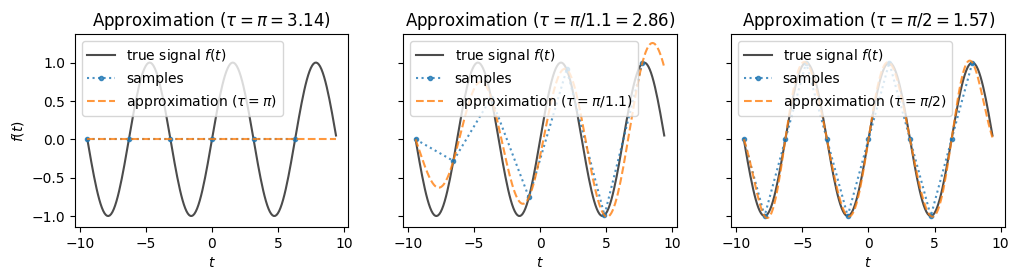

In [130]:
import numpy as np
import matplotlib.pyplot as plt

def approx(x, tau):
    # tau: サンプリング周期
    # 間隔を指定してのサンプリングが難しかったのでarangeで生成
    x_samples = np.arange(-3 * np.pi, 3 * np.pi, tau)
    y_samples = np.sin(x_samples)
    
    y_hat = []
    for i in range(len(x)):
        y_hat_i = 0
        for j in range(len(y_samples)):
            y_hat_i += y_samples[j] * np.sinc((x[i] - x_samples[j]) / tau)
        y_hat.append(y_hat_i)
    return x_samples, y_samples, np.array(y_hat)

taus = [
    ("\pi", np.pi),
    ("\pi/1.1", np.pi/1.1),
    ("\pi/2", np.pi/2),
]
fig, axes = plt.subplots(figsize=[12, 2.5], ncols=len(taus), sharey=True)
for i, ax in enumerate(axes):
    # true signal
    x = np.arange(-3 * np.pi, 3 * np.pi, 0.1)
    y = np.sin(x)
    ax.plot(x, y, label=r"true signal $f(t)$", color="black", alpha=0.7)

    # approximate
    tau_str, tau = taus[i]
    x_samples, y_samples, y_hat = approx(x, tau=tau)
    ax.plot(x_samples, y_samples, label=r"samples", alpha=0.8, linestyle=":", marker=".")
    ax.plot(x, y_hat, label=rf"approximation ($\tau = {tau_str}$)", alpha=0.8, linestyle="--")
    ax.set(xlabel=r"$t$", title=rf"Approximation ($\tau = {tau_str} = {tau:.2f}$)")#, ylim=(-1.2, 3.2))
    ax.legend()
    if i == 0:
        ax.set(ylabel=r"$f(t)$")

fig.show()

周期$T$が$T=2\tau$なら、周波数が$\omega=2\pi/T=\pi/\tau=W$

1周期が$T = 2\tau = 2\pi$のsinに対してサンプリング間隔が$\tau = \pi$だとナイキスト周波数であり、もとの信号が復元できない様子。$\omega = 2\pi/T =  2\pi/2\pi = 1$…？